<a href="https://colab.research.google.com/github/GLuarte/MLBI/blob/master/Tarea_1_1_MLBI(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 1


### Pregunta 1



In [77]:
!pip install tensorflow==2.0

##### Imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import logging

In [79]:
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



print(tf.__version__)

2.0.0


#####Importe de dataset, se guardó el excel de la tarea en formato csv sin hacerle ninguna modificación, luego se identifican los tipos de datos en esta

In [80]:
dataset=pd.read_csv("dataset1.csv",sep=";")
dataset.dtypes


crr_Nom                      object
psu_Nem                       int64
psu_Leng                      int64
psu_Mate                      int64
psu_Cie                       int64
psu_Pond                      int64
Longitud                    float64
Latitud                     float64
cred_apr                      int64
distancia                   float64
F                             int64
M                             int64
PARTICULAR_SUBVENCIONADO      int64
PARTICULAR_PAGADO             int64
MUNICIPAL                     int64
cluster                      object
dtype: object

##### Los datos categoricos se pasan a numericos y la columna de carreras (crr_Nom) se transforma en columnnas dummy para cada carrera

In [81]:
dataset['crr_Nom']=pd.Categorical(dataset['crr_Nom'])
dataset['crr_Nom']=dataset.crr_Nom.cat.codes

dataset['Longitud']=pd.Categorical(dataset['Longitud'])
dataset['Longitud']=dataset.Longitud.cat.codes

dataset['Latitud']=pd.Categorical(dataset['Latitud'])
dataset['Latitud']=dataset.Latitud.cat.codes

dataset['cluster']=pd.Categorical(dataset['cluster'])
dataset['cluster']=dataset.cluster.cat.codes

dataset=pd.get_dummies(dataset, drop_first=True,columns=['crr_Nom'])

dataset.dtypes

psu_Nem                       int64
psu_Leng                      int64
psu_Mate                      int64
psu_Cie                       int64
psu_Pond                      int64
Longitud                      int16
Latitud                       int16
cred_apr                      int64
distancia                   float64
F                             int64
M                             int64
PARTICULAR_SUBVENCIONADO      int64
PARTICULAR_PAGADO             int64
MUNICIPAL                     int64
cluster                        int8
crr_Nom_1                     uint8
crr_Nom_2                     uint8
crr_Nom_3                     uint8
crr_Nom_4                     uint8
crr_Nom_5                     uint8
crr_Nom_6                     uint8
crr_Nom_7                     uint8
crr_Nom_8                     uint8
crr_Nom_9                     uint8
crr_Nom_10                    uint8
crr_Nom_11                    uint8
crr_Nom_12                    uint8
crr_Nom_13                  

In [82]:
dataset.head()

,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_Nom_1,crr_Nom_2,crr_Nom_3,crr_Nom_4,crr_Nom_5,crr_Nom_6,crr_Nom_7,crr_Nom_8,crr_Nom_9,crr_Nom_10,crr_Nom_11,crr_Nom_12,crr_Nom_13
0,783,653,685,672,735,19,72,38,20.201244,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,19,72,36,20.201244,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,19,72,36,20.201244,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,19,72,21,20.201244,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,19,72,19,20.201244,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


##### Se establecen los sample para testeo y entrenamiento

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

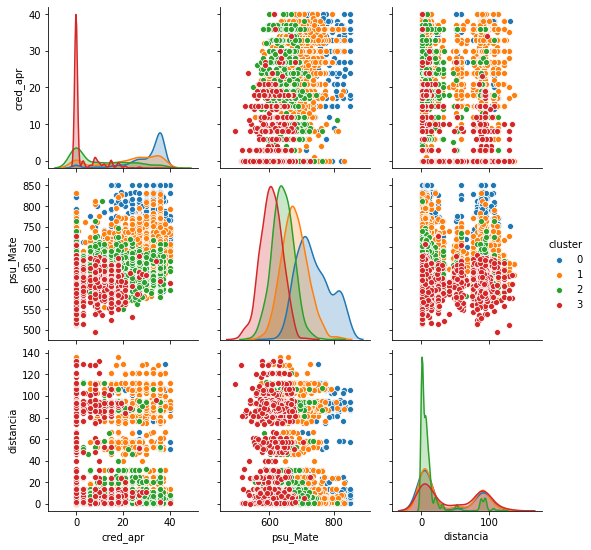

In [84]:
sns.pairplot(train_dataset[['cluster','cred_apr','psu_Mate','distancia']], diag_kind="kde",hue='cluster')


##### Revision de estadisticas generales

In [85]:
train_stats = train_dataset.describe()
train_stats.pop('cluster')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
psu_Nem,6293.0,668.304147,71.063001,373.000000,620.000000,678.000000,723.000000,826.000000
psu_Leng,6293.0,618.440172,65.627264,361.000000,574.000000,616.000000,660.000000,831.000000
psu_Mate,6293.0,670.424122,57.195743,494.000000,631.000000,667.000000,702.000000,850.000000
psu_Cie,6293.0,623.086127,60.270625,322.000000,585.000000,623.000000,661.000000,850.000000
psu_Pond,6293.0,659.822183,48.246612,512.000000,626.000000,657.000000,693.000000,822.000000
Longitud,6293.0,111.485301,62.361595,0.000000,61.000000,102.000000,159.000000,245.000000
Latitud,6293.0,123.728905,61.202912,0.000000,89.000000,116.000000,168.000000,245.000000
cred_apr,6293.0,18.153981,14.311058,0.000000,0.000000,21.000000,33.000000,40.000000
distancia,6293.0,33.311633,39.260338,0.415859,2.654544,8.198763,86.263468,136.283837
F,6293.0,0.219132,0.413691,0.000000,0.000000,0.000000,0.000000,1.000000


##### Se separa la variable o etiqueta objetivo del resto de los datasets de entrenamiento y testeo

In [0]:
train_labels = train_dataset.pop('cluster')
test_labels = test_dataset.pop('cluster')

##### Se normalizan las variables  para q tengan la misma escala

In [0]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


##### Contruccion del modelo
###### Se establece un modelo con 2 hidden layers de 13 nodos cada una 

In [0]:
def build_model():
      
      
    model = keras.Sequential([
    layers.Dense(13, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(13, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model


In [0]:
model = build_model()

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 13)                364       
_________________________________________________________________
dense_16 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [91]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result


array([[ 0.06679832],
       [ 0.5688492 ],
       [-0.24015856],
       [-0.09195439],
       [ 0.47027233],
       [ 0.34259406],
       [ 0.6302085 ],
       [ 0.8489652 ],
       [ 0.3221401 ],
       [-0.51775527]], dtype=float32)

In [92]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [93]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.116553,0.251494,0.116553,0.190081,0.315192,0.190081,995
996,0.116698,0.251161,0.116698,0.192616,0.319473,0.192616,996
997,0.116343,0.250181,0.116343,0.190221,0.316074,0.190221,997
998,0.116717,0.251367,0.116717,0.192978,0.318975,0.192978,998
999,0.116450,0.250880,0.116450,0.194231,0.322147,0.194231,999


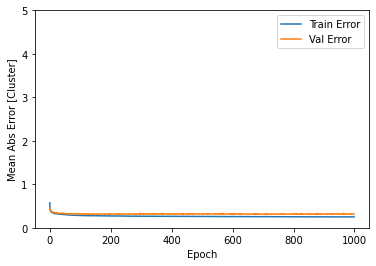

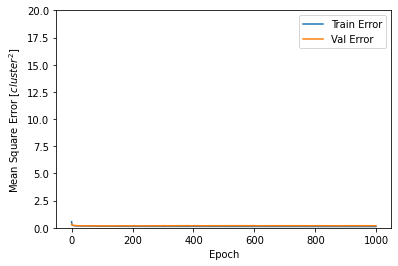

In [94]:
def plot_history(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Cluster]')
    plt.plot(hist['epoch'], hist['mae'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
               label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$cluster^2$]')
    plt.plot(hist['epoch'], hist['mse'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
              label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
plot_history(history)


.....................................................................................

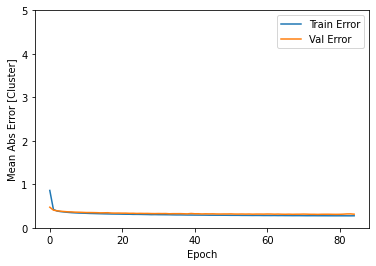

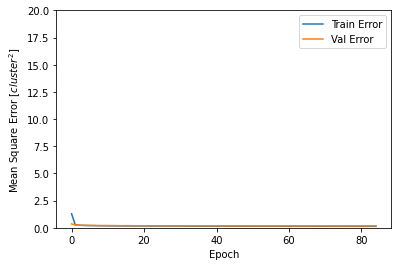

In [95]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [96]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} cluster".format(mae))

1573/1573 - 0s - loss: 0.1783 - mae: 0.3142 - mse: 0.1783
Testing set Mean Abs Error:  0.31 cluster


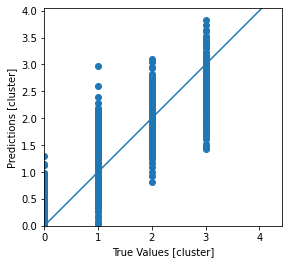

In [97]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [cluster]')
plt.ylabel('Predictions [cluster]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

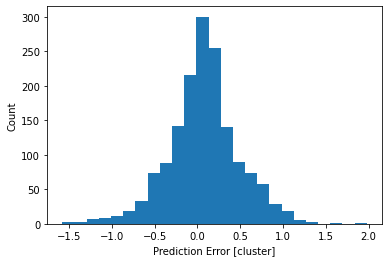

In [98]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [cluster]")
_ = plt.ylabel("Count")

In [99]:
y_pred=[]
y_test=(test_labels.values.tolist())
test_predictions=list(test_predictions)
for i in range(len(test_predictions)):
  y_pred.append(int(round(test_predictions[i])))

  
print(len(y_test))
print(y_pred)

1573
[1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 1, 0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 3, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 2, 3, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 4, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 3, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 0, 2, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 3, 2, 2, 2

In [100]:
print(confusion_matrix(y_test,y_pred))

[[192  63   0   0   0]
 [ 28 600 114   2   0]
 [  0  26 290  33   0]
 [  0   2  65 152   6]
 [  0   0   0   0   0]]


In [101]:
accuracy_score(y_test,y_pred)

0.7844882390336936

In [102]:
f1_score(y_test,y_pred, average='micro')

0.7844882390336936

### Pregunta 2

In [104]:
dataset=pd.read_csv('dataset2.csv')
dataset.dtypes

x            float64
y            float64
condition      int64
dtype: object

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

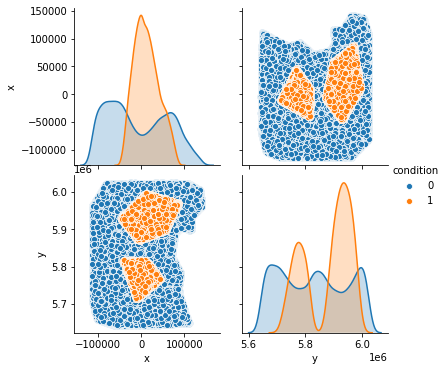

In [106]:
sns.pairplot(train_dataset[['condition','x','y']], diag_kind="kde",hue='condition')

In [107]:
train_stats = train_dataset.describe()
train_stats.pop('condition')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
x,65318.0,-3.284569e+03,63542.702874,-1.151375e+05,-5.724866e+04,-4.104147e+03,4.854059e+04,1.424726e+05
y,65318.0,5.838861e+06,111726.339480,5.641731e+06,5.740773e+06,5.841653e+06,5.938792e+06,6.025505e+06


In [0]:
train_labels = train_dataset.pop('condition')
test_labels = test_dataset.pop('condition')

In [0]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
      
      
    model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [112]:
model=build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [116]:
history=model.fit(normed_train_data,train_labels, batch_size=10, epochs=10,validation_split=.2)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Train on 52254 samples, validate on 13064 samples
Epoch 1/10
52254/52254 [==============================] - 6s 123us/sample - loss: 0.1580 - accuracy: 0.8034 - val_loss: 0.1588 - val_accuracy: 0.8020
Epoch 2/10
52254/52254 [==============================] - 7s 125us/sample - loss: 0.1580 - accuracy: 0.8034 - val_loss: 0.1588 - val_accuracy: 0.8020
Epoch 3/10
52254/52254 [==============================] - 6s 123us/sample - loss: 0.1579 - accuracy: 0.8034 - val_loss: 0.1589 - val_accuracy: 0.8020
Epoch 4/10
52254/52254 [==============================] - 6s 124us/sample - loss: 0.1580 - accuracy: 0.8034 - val_loss: 0.1588 - val_accuracy: 0.8020
Epoch 5/10
52254/52254 [==============================] - 7s 126us/sample - loss: 0.1580 - accuracy: 0.8034 - val_loss: 0.1588 - val_accuracy: 0.8020
Epoch 6/10
52254/52254 [==============================] - 7s 126us/sample - loss: 0.1579 - accuracy: 0.8034 - val_loss: 0.1588 - val_accuracy: 0.8020
Epoch 7/10
52254/52254 [==========================

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.157949,0.803422,0.158820,0.801975,5
6,0.157937,0.803422,0.158890,0.801975,6
7,0.157961,0.803422,0.158824,0.801975,7
8,0.157956,0.803422,0.158821,0.801975,8
9,0.157953,0.803422,0.158834,0.801975,9


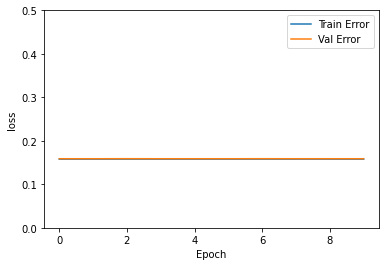

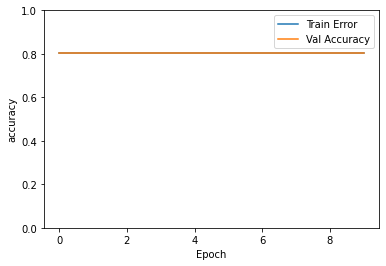

In [117]:
def plot_history(history):
  
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
               label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
               label = 'Val Error')
  
  plt.ylim([0,.5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
               label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
              label = 'Val Accuracy')
  
  plt.ylim([0,1])
  plt.legend()
  plt.show()
    
plot_history(history)

In [118]:
test_predictions=model.predict(normed_test_data).flatten()

In [119]:
y_pred=[]
y_test=(test_labels.values.tolist())
test_predictions=list(test_predictions)
for i in range(len(test_predictions)):
  y_pred.append(int(round(test_predictions[i])))
print(confusion_matrix(y_test,y_pred))

[[13127     0]
 [ 3202     0]]


In [120]:
accuracy_score(y_test,y_pred)

0.8039071590421949

In [121]:
f1_score(y_test,y_pred,average='micro')

0.803907159042195